## 分析当前数据

In [124]:
import pandas as pd

data_org = pd.read_csv("COVID19_line_list_data.csv")

data_org.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,...,01-11-2020,12/29/2019,01-04-2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01-12-2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01-04-2020,...,1/17/2020,NaN,01-03-2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [125]:
column_names = data_org.columns
column_names

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link'],
      dtype='object')

In [126]:
infos= data_org.info()
infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [127]:
descr = data_org.describe()
descr

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000


## 数据清理

In [128]:
# 根据题目要求删除没有用的列
dataset = data_org.drop(['case_in_country','id', 'Unnamed: 3', 'If_onset_approximated', 'summary', 'source', 'link'], axis=1)

# 日期变成统一格式
dataset['reporting date'] = pd.to_datetime(dataset['reporting date'])
dataset['hosp_visit_date'] = pd.to_datetime(dataset['hosp_visit_date'])
dataset['symptom_onset'] = pd.to_datetime(dataset['symptom_onset'])
dataset['exposure_start'] = pd.to_datetime(dataset['exposure_start'])
dataset['exposure_end'] = pd.to_datetime(dataset['exposure_end'])

# 把治愈和死亡中的具体日期转变为1来和其他保持一致
# 使用 pandas 的 apply 函数将非零和非一的所有值转换为1
dataset['recovered'] = dataset['recovered'].apply(lambda x: 1 if x not in [0, 1] else x)
dataset['death'] = dataset['death'].apply(lambda x: 1 if x not in [0, 1] else x)

# 然后使用 astype 函数将列转换为 int 类型
dataset['recovered'] = dataset['recovered'].astype(int)
dataset['death'] = dataset['death'].astype(int)

# 症状一栏分为有无症状0/1
dataset['symptom'] = dataset['symptom'].notna().astype(int)



row_173 = dataset.iloc[172]
print(row_173)

reporting date     2020-01-27 00:00:00
location                       Beijing
country                          China
gender                          female
age                               69.0
symptom_onset      2020-01-10 00:00:00
hosp_visit_date    2020-01-22 00:00:00
exposure_start                     NaT
exposure_end                       NaT
visiting Wuhan                       1
from Wuhan                         NaN
death                                1
recovered                            1
symptom                              0
Name: 172, dtype: object


In [129]:
# 缺失值处理 - 三种情况 删除/填充（平均数/中位数/众数）
# 对于缺失值很少的，直接删除
dataset.dropna(subset=["from Wuhan"], inplace=True)
dataset.dropna(subset=["reporting date"], inplace=True)

# 对于缺失值有点多的，找合适方法填补
# 对性别 使用众数填充缺失值
mode_gender = dataset['gender'].mode()[0]
dataset['gender'].fillna(mode_gender, inplace=True)
# 对年龄 使用中位数补充缺失值
median_age = dataset['age'].median()
dataset['age'].fillna(median_age, inplace=True)

# 对于缺失值特别多尤其日期，将日期时间转换为自某一特定日期（如1970年1月1日）以来的天数
dataset['reporting date'] = (dataset['reporting date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
dataset['symptom_onset'] = (dataset['symptom_onset'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
dataset['hosp_visit_date'] = (dataset['hosp_visit_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
dataset['exposure_start'] = (dataset['exposure_start'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
dataset['exposure_end'] = (dataset['exposure_end'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')


In [130]:
# 后续其他处理
dataset['from Wuhan'] = dataset['from Wuhan'].astype(int)
dataset['age'] = dataset['age'].astype(int)
# 将male转换为0,female转换为1
dataset['gender'] = dataset['gender'].replace({'male': 0, 'female': 1})

dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1084
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reporting date   1080 non-null   int64  
 1   location         1080 non-null   object 
 2   country          1080 non-null   object 
 3   gender           1080 non-null   int64  
 4   age              1080 non-null   int32  
 5   symptom_onset    559 non-null    float64
 6   hosp_visit_date  503 non-null    float64
 7   exposure_start   128 non-null    float64
 8   exposure_end     341 non-null    float64
 9   visiting Wuhan   1080 non-null   int64  
 10  from Wuhan       1080 non-null   int32  
 11  death            1080 non-null   int32  
 12  recovered        1080 non-null   int32  
 13  symptom          1080 non-null   int32  
dtypes: float64(4), int32(5), int64(3), object(2)
memory usage: 105.5+ KB


## 清理后的数据

In [131]:
# locatioin种类过多，无法进行编码，对可视化有影响
data = dataset.drop(['location'], axis=1)

## 数据分析和可视化

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

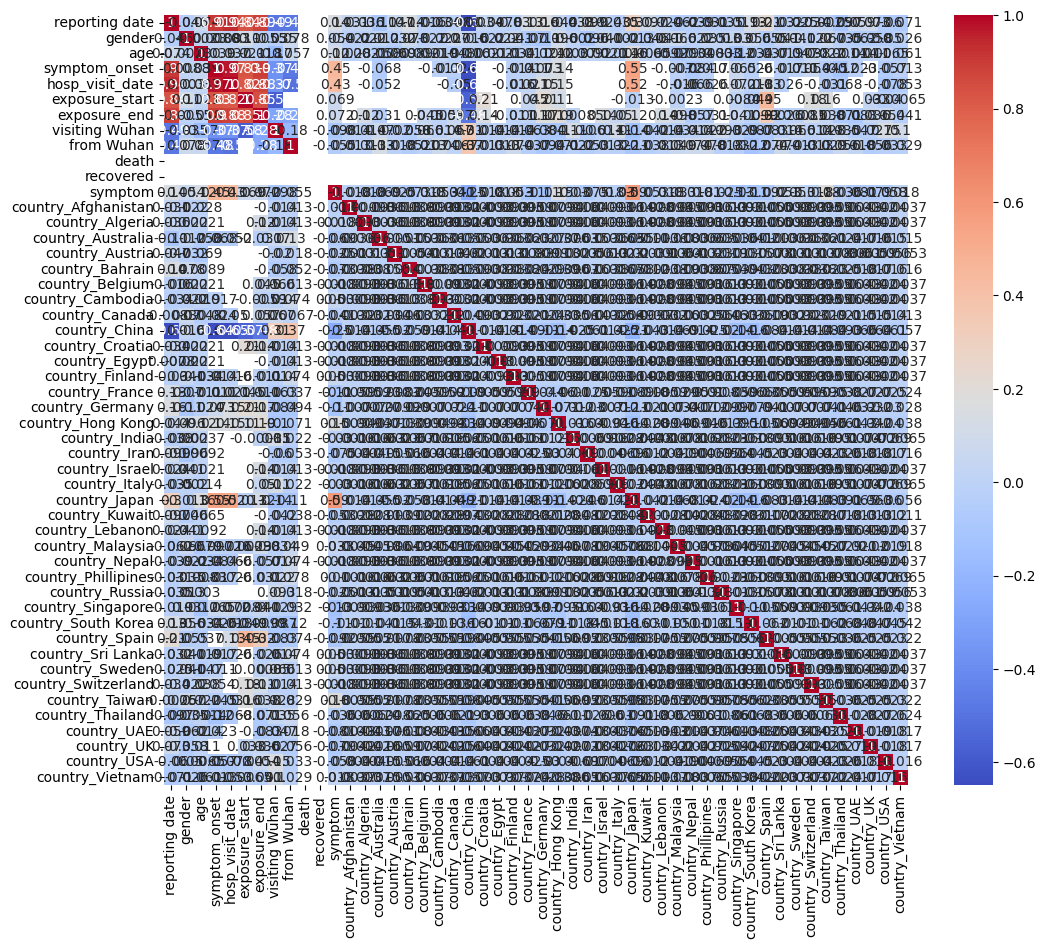

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# 对country字段进行独热编码
data = pd.get_dummies(data, columns=['country'])

# 计算所有变量的相关性
correlation = data.corr()

# 创建一个热图来可视化这些相关性
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# 对数据进行标准化（去均值，单位方差）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 执行PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# 创建一个折线图来显示每个主成分解释的方差
plt.figure(figsize=(10,7))
plt.plot(range(1, len(data.columns) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


